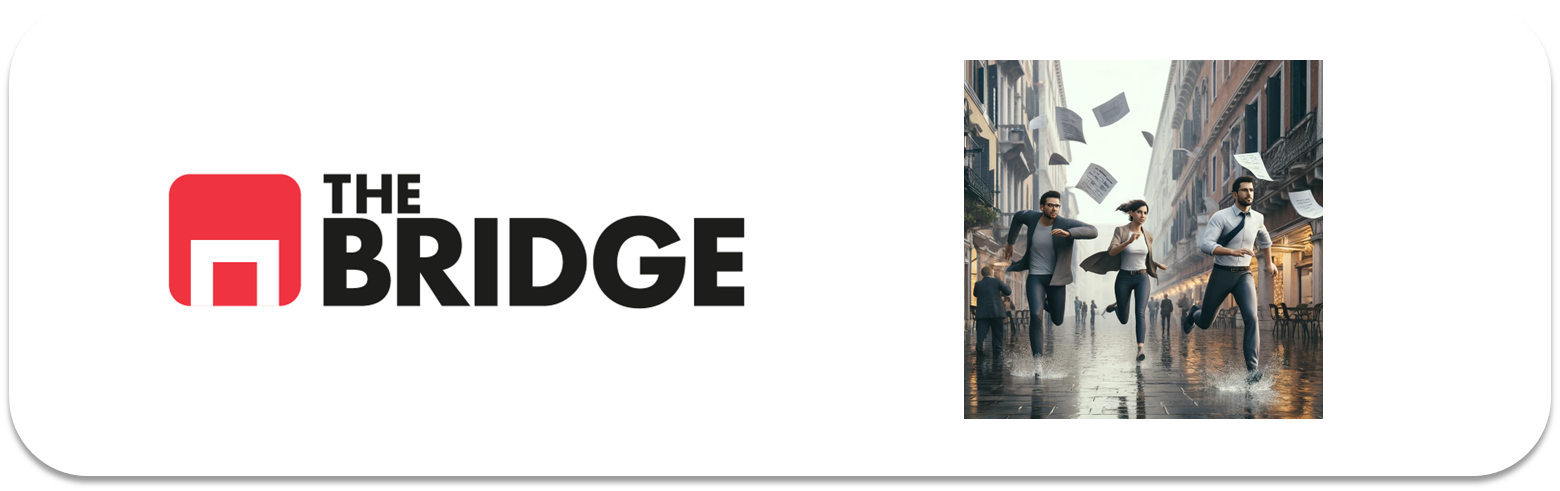

## Repaso EDA

### Proceso EDA
*Nota: El EDA genérico es aplicable 100% al "miniEDA" de un dataset para ML, si es supervisado recuerda: Train-Test, y el miniEDA sobre... Train*

PARTE I  
1. **Establecer objetivos**  
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables**
4. **Crear otras variables**: Medias, porcentajes, densidades,... 

PARTE II  
4. **Aplicar tendencia central a todas las variables**  
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras   
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja  
7. **Analizar las medidas de dispersión de las variables numéricas**  
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)  
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")  
10. **Trata los outliers**: (Pre o post análisis)
    - Dejar tal cual y tenerlo en cuenta en posibles revisiones.  
    - Hacer dos análisis: Sin outliers, solo outliers  
    - Categorizar la variable   
    - Capar la variable:   
        1. Poniendo un tope de valor máximo (o cap, por eso se llama malamente "cappar")   
        2. Eliminar valores superiores a un percentil determinado (90-95%)  
    Esto es aplicable a ML igual
    
PARTE III  
11. **Revisa prioridades, preguntas y notas hasta el momento**  
12. **Preparara el analisis bivariante** en función de la revisión anterior.  
13. **Empieza por categóricas importantes/target**: combinalas con categóricas y numéricas  
14. **Sigue con numéricas importantes/target**  
15. **Analiza las parejas de variables que necesites para contestar tus preguntas**  
    15.1 **Es directo así que: Matriz de correlación, heatmap y pairplot**  
16. **Recapitula**: Clasifica ya tus hallazgos en posibles mensajes, elementos a profundizar, cosas interesantes pero no importantes (descártalas). Añade las preguntas contestadas y la lista de preguntas sin contestar.  

PARTE IV  
17. **Intenta resolver todas las preguntas pendientes**  
18. Si necesitas análisis más complicados (3 o más variables): Planifica muy bien que grupos  
19. Aplica lo visto en estas sesiones, tendrás que probar variaciones hasta llegar a encontrar el punto adecuado.  
20. **Acaba el análisis**: Cierras las preguntas pendientes, lo que te quede por trabajar -> Lineas de trabajo futuro.  



In [2]:
import bootcampviztools as bt
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path
from pprint import pprint

### Obtención de Datos

Fuentes:
- Periódicos -> Datos tablas
- Chat GPT -> Poblaciones
- INE -> Pisos Turísticos

In [4]:
df_base = pd.read_csv("./data/alquileres_y_salarios_1222.csv", sep = "|")
df_poblacion = pd.read_csv("./data/datos_poblacion.csv", sep = "|")
df_turismo = pd.read_excel("./data/turismo.xlsx")

In [5]:
df_base.head()

,Comunidad,Alquiler_2012,Alquiler_2022,Salario_2012,Salario_2022
0,País Vasco,10.14,13.80,22855.0,25442.0
1,Madrid,9.53,15.42,25254.0,26084.0
2,Cataluña,8.87,14.92,23904.0,24590.0
3,España,7.28,11.03,23594.0,24395.0
4,Navarra,7.21,10.39,22951.0,25060.0


In [6]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Comunidad      18 non-null     object 
 1   Alquiler_2012  18 non-null     float64
 2   Alquiler_2022  18 non-null     float64
 3   Salario_2012   18 non-null     float64
 4   Salario_2022   18 non-null     float64
dtypes: float64(4), object(1)
memory usage: 848.0+ bytes


In [7]:
df_total = df_base.merge(df_poblacion,on = "Comunidad", how = "left")
df_total

,Comunidad,Alquiler_2012,Alquiler_2022,Salario_2012,Salario_2022,poblacion_2012,superficie,poblacion_2022
0,País Vasco,10.14,13.80,22855.0,25442.0,2189534,7234,2215668
1,Madrid,9.53,15.42,25254.0,26084.0,6466996,8028,6779888
2,Cataluña,8.87,14.92,23904.0,24590.0,7522596,32014,7695214
3,España,7.28,11.03,23594.0,24395.0,46778514,506158,47289517
4,Navarra,7.21,10.39,22951.0,25060.0,642051,10391,661530
5,Baleares,7.16,14.16,21760.0,23292.0,1115999,4992,1155999
6,Cantabria,6.83,10.32,20787.0,22844.0,592542,5321,582905
7,Asturias,6.61,8.38,21236.0,24069.0,1063870,10603,1028244
8,Aragón,6.59,8.85,21088.0,23339.0,1344267,47720,1327707
9,Andalucía,6.18,9.22,21653.0,23023.0,8414240,87599,8464411


In [8]:
df_total = df_total.merge(df_turismo, on = "Comunidad", how = "left")

In [9]:
df_total

,Comunidad,Alquiler_2012,Alquiler_2022,Salario_2012,Salario_2022,poblacion_2012,superficie,poblacion_2022,Pernoct_Turisticas_2012,Pernoct_Turisticas_2022
0,País Vasco,10.14,13.80,22855.0,25442.0,2189534,7234,2215668,31931,166800
1,Madrid,9.53,15.42,25254.0,26084.0,6466996,8028,6779888,347521,665150
2,Cataluña,8.87,14.92,23904.0,24590.0,7522596,32014,7695214,910596,1063721
3,España,7.28,11.03,23594.0,24395.0,46778514,506158,47289517,8862527,12607487
4,Navarra,7.21,10.39,22951.0,25060.0,642051,10391,661530,42282,81516
5,Baleares,7.16,14.16,21760.0,23292.0,1115999,4992,1155999,1325043,1478258
6,Cantabria,6.83,10.32,20787.0,22844.0,592542,5321,582905,80819,129258
7,Asturias,6.61,8.38,21236.0,24069.0,1063870,10603,1028244,34433,88448
8,Aragón,6.59,8.85,21088.0,23339.0,1344267,47720,1327707,107510,202150
9,Andalucía,6.18,9.22,21653.0,23023.0,8414240,87599,8464411,1179571,2522308


In [10]:
df_total.head() # Qué tipo de valores, que pinta tienen

,Comunidad,Alquiler_2012,Alquiler_2022,Salario_2012,Salario_2022,poblacion_2012,superficie,poblacion_2022,Pernoct_Turisticas_2012,Pernoct_Turisticas_2022
0,País Vasco,10.14,13.80,22855.0,25442.0,2189534,7234,2215668,31931,166800
1,Madrid,9.53,15.42,25254.0,26084.0,6466996,8028,6779888,347521,665150
2,Cataluña,8.87,14.92,23904.0,24590.0,7522596,32014,7695214,910596,1063721
3,España,7.28,11.03,23594.0,24395.0,46778514,506158,47289517,8862527,12607487
4,Navarra,7.21,10.39,22951.0,25060.0,642051,10391,661530,42282,81516


In [11]:
df_total.info() # ¿nulos?¿bien tipificadas las variables?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Comunidad                18 non-null     object 
 1   Alquiler_2012            18 non-null     float64
 2   Alquiler_2022            18 non-null     float64
 3   Salario_2012             18 non-null     float64
 4   Salario_2022             18 non-null     float64
 5   poblacion_2012           18 non-null     int64  
 6   superficie               18 non-null     int64  
 7   poblacion_2022           18 non-null     int64  
 8   Pernoct_Turisticas_2012  18 non-null     int64  
 9   Pernoct_Turisticas_2022  18 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ KB


In [13]:
df_total.describe().T # Rangos, es necesario escalar, presentir los outliers, un feeling de cómo serán las distribuciones

,count,mean,std,min,25%,50%,75%,max
Alquiler_2012,18.0,6.691111e+00,1.505675e+00,4.65,5.672500e+00,6.385,7.197500e+00,10.14
Alquiler_2022,18.0,1.006278e+01,2.911082e+00,5.91,7.900000e+00,9.670,1.120250e+01,15.42
Salario_2012,18.0,2.187283e+04,1.393150e+03,19641.00,2.093800e+04,21683.500,2.265775e+04,25254.00
Salario_2022,18.0,2.353811e+04,1.161686e+03,21897.00,2.285575e+04,23157.500,2.431350e+04,26084.00
poblacion_2012,18.0,5.197613e+06,1.066187e+07,323609.00,1.097758e+06,2117008.000,4.452241e+06,46778514.00
superficie,18.0,5.623978e+04,1.161227e+05,4992.00,7.592250e+03,17284.500,4.619850e+04,506158.00
poblacion_2022,18.0,5.254391e+06,1.078608e+07,315675.00,1.088029e+06,2131828.000,4.496612e+06,47289517.00
Pernoct_Turisticas_2012,18.0,9.847252e+05,2.148919e+06,23373.00,4.549300e+04,78783.000,9.755302e+05,8862527.00
Pernoct_Turisticas_2022,18.0,1.400832e+06,2.955472e+06,58190.00,1.393985e+05,208870.000,1.374624e+06,12607487.00


### Qué son mis datos, clasificación de variables

|Variable|Descripcion|Tipo|Prioridad|
|:-:|:-:|:-:|:-:|
|Comunidad|Comunidad o toda España|Categórica|1|
|Alquiler_2012|Precio por $m^2$ en 2012|Numérica|1|
|Alquiler_2022|Precio por $m^2$ en 2022|Numérica|0|
|Salario_2012|Salario medio en € en 2012|Numérica|1|
|Salario_2022|Salario medio en € en 2022|Numérica|0|
|poblacion_2012|Población en 2012 en habitantes|Numérica|1|
|poblacion_2022|Población en 2022 en num. habitantes|Numérica|1|
|superficie|Extensión en $km^2$ del territorio considerado|Numérica|2|
|Pernoct_Turisticas_2012|Viajeros entrados por territorio en apartamentos turísticos en 2012|Numérica|2|
|Pernoct_Turisticas_2022|Viajeros entrados por territorio en apartamentos turísticos en 2022|Numérica|2|


### Objetivo, preguntas, hipótesis de partida

¿Lo primero cuál es mi objetivo? Aquí también hay objetivo de Negocio. En mi caso: **Evolución del precio del alquiler en comparación con los salarios y el uso de pisos turísticos.**

Por **hipótesis**: Si tengo hipótesis, pues las pongo
- Los alquileres han subido mucho en todas las comunidades de España, es decir un crecimiento del 3% sostenido en 10 años (equivalente a un 35% mínimo en esos diez años)
- Los alquileres han subido mucho más que los salarios. Y ambos han subido, junto con el uso de pisos turísticos.
- Una posible causa es el aumento del uso de los pisos turísticos.
- Existe una relación entre la densidad de población y el aumento de los alquileres

Por **targets prioritarias**: Si no tengo hipótesis claras, escojo una o dos variables y me planteo un "se pueden predecir con el resto" y hago un miniEDA -> Saldrán datos interesantes. (Aquí hay que ser exahustivos)
- Alquileres: ¿Cómo han evolucionado en general? ¿Cuánto? Relación con Salarios, con Ocupación Turística -> Puedo predecir el precio del alquiler de una comunidad a partir de los otros datos?
- Salarios: ¿Cómo han evolucioando en general? ¿Cuánto? Relación con Salarios -> Puedo predecir el salario en 2022 a partir de los otros datos?

**Combinado**: Pues eso parto de hipótesis, pero complemento con el "miniEDA" dirigido


### Limpieza del  Dataset y otras transformaciones
*NOTA: Es muy posible que queramos hacer las transformaciones después de una primera vuelta de análisis*

Esta muy limpio, lo que vamos a hacer es construir algunas columnas con promedios, ¿por qué? (aquí entra en juego la experiencia y el conocimiento de dominio, en mi caso es porque si veo personas y espacios, me salen densidades... y si veo dos puntos en el tiempo me salen deltas, y porque con valores tan dispares es bueno buscar escalas comparables como los porcentajes):

In [14]:
df_total["delta_alquiler"] = ((df_total["Alquiler_2022"] - df_total["Alquiler_2012"])/df_total["Alquiler_2012"]).round(3)*100

In [15]:
df_total["delta_sueldos"] = ((df_total["Salario_2022"] - df_total["Salario_2012"])/df_total["Salario_2012"]).round(3)*100

In [16]:
df_total["delta_turismo"] = ((df_total["Pernoct_Turisticas_2022"] - df_total["Pernoct_Turisticas_2012"])/df_total["Pernoct_Turisticas_2012"]).round(3)*100

In [17]:
df_total["delta_poblacion"] = ((df_total["poblacion_2022"] - df_total["poblacion_2012"])/df_total["poblacion_2012"]).round(3)*100

In [18]:
df_total["densidad_pob_2012"] = df_total["poblacion_2012"]/df_total["superficie"]
df_total["densidad_pob_2022"] = df_total["poblacion_2022"]/df_total["superficie"]

In [19]:
df_total["densidad_turistica_2012"] = df_total["Pernoct_Turisticas_2012"]/df_total["superficie"]
df_total["densidad_turistica_2022"] = df_total["Pernoct_Turisticas_2022"]/df_total["superficie"]

### Univariante

*NOTA: Es conveniente hacer el univariante completo y el bivarianete lo más completo posible, pero si nos dirigen las preguntas e hipótesis, podemos hacer una primera batida por respuestas y luego completar*

#### Categóricas

No hay que analizarla son las comunidades, y en realidad es un índice no es categórica.

In [20]:
### Numéricas
### Por orden de prioridad (el análisis completo como ejercicio personal)

numericas_1 = ["delta_alquiler","delta_sueldos","delta_turismo","delta_poblacion"]

(4, 2)


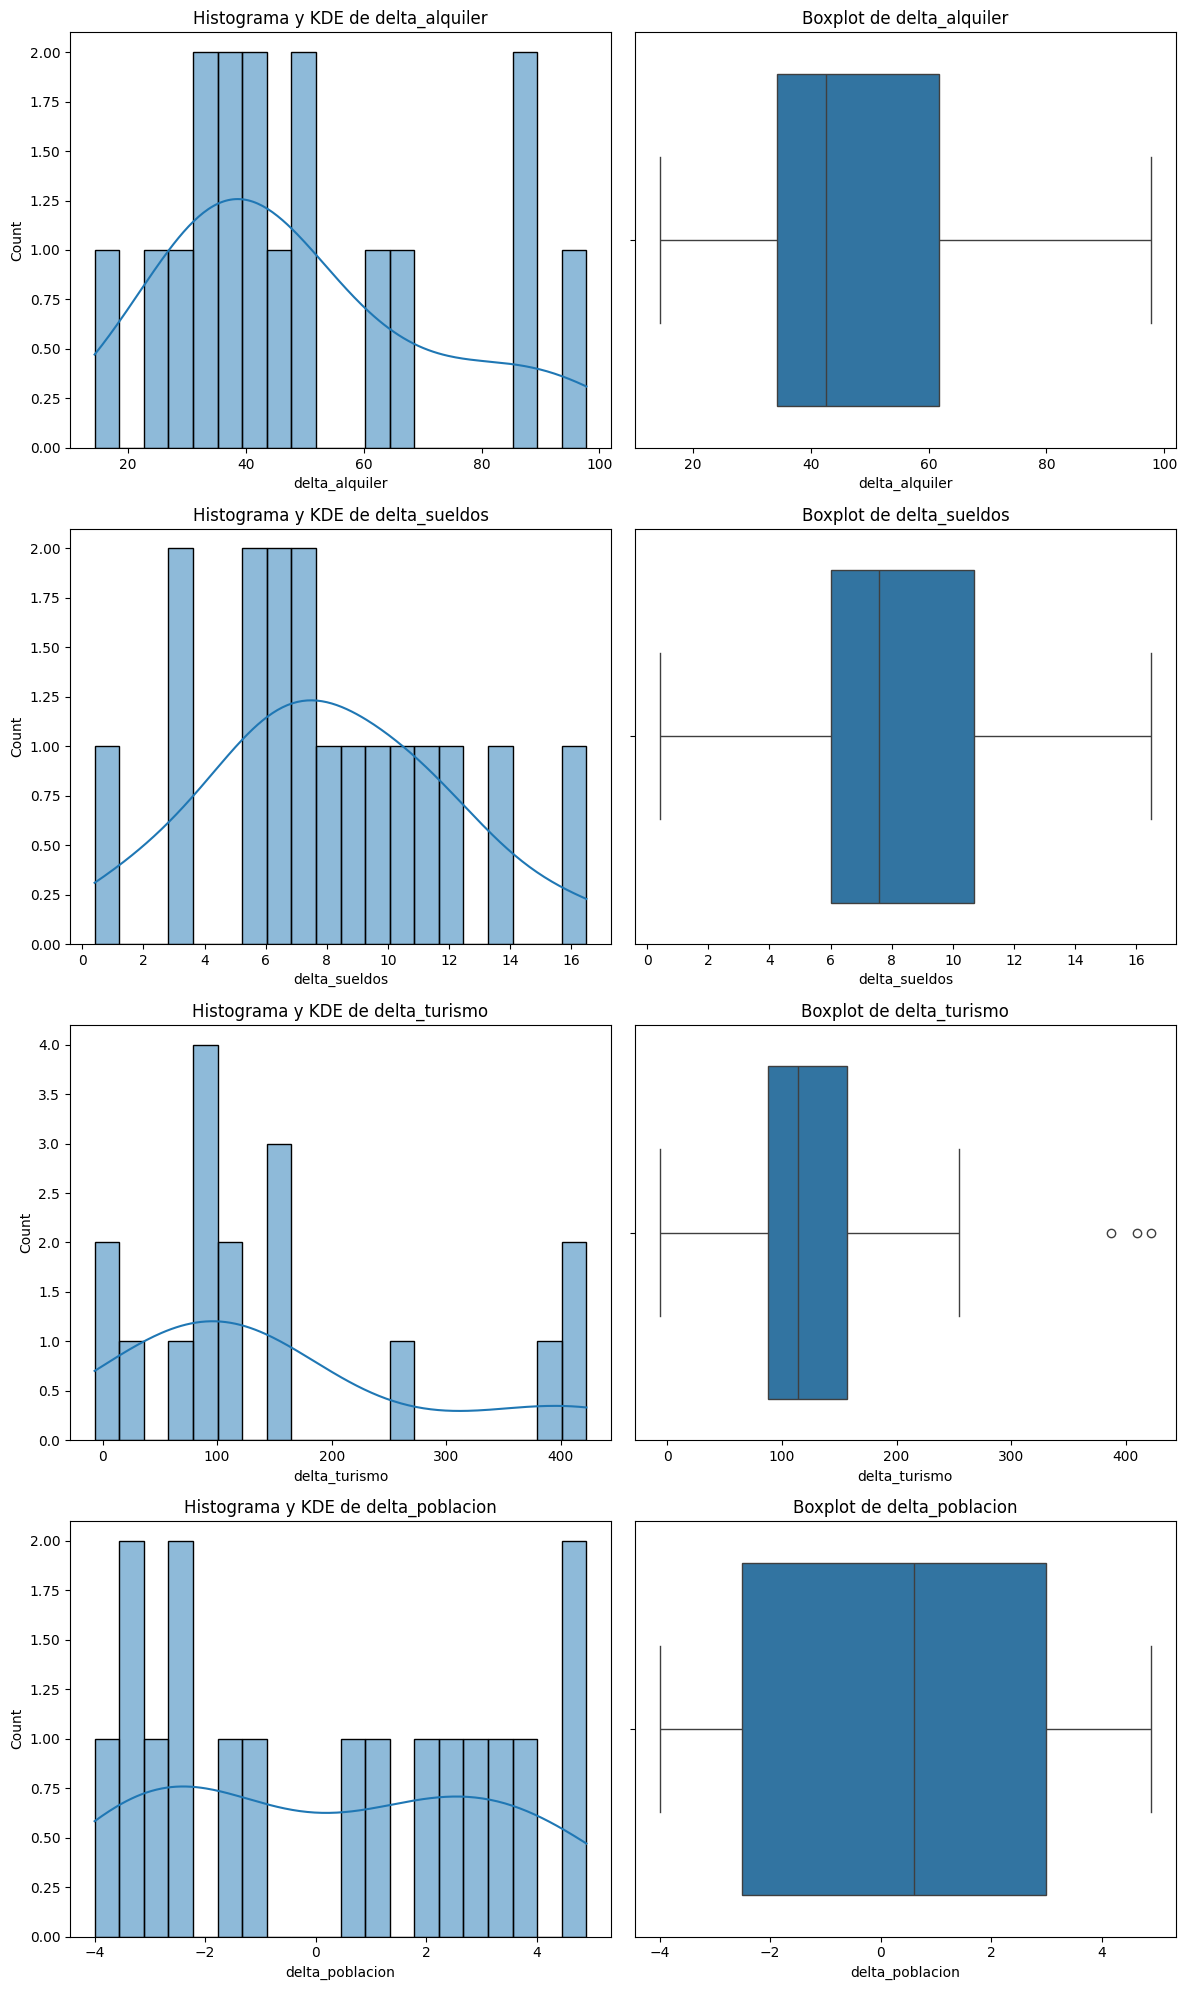

In [21]:
bt.plot_combined_graphs(df_total.loc[df_total.Comunidad != "España"], columns= numericas_1, bins = 20)

* *Las gráficas ya parecen darme la razon en parte, la mediana de crecimiento de alquiler está por encima del 40%*  
* *Otro resultado potente es la disparidad de distribuciones entre alquileres y sueldos*  
* *El crecimiento del uso de pisos de alquiler turístico es muy significativa la mediana está por encima del 100%*  
* *En nuestro caso la mediana quiere decir el 50% de las comuniades autónomas (las ciudades autónomas no se incluyen en el EDA)*  

Veamos números:

In [22]:
df_total.loc[df_total.Comunidad != "España"][numericas_1].describe()

,delta_alquiler,delta_sueldos,delta_turismo,delta_poblacion
count,17.000000,17.000000,17.000000,17.000000
mean,49.258824,8.017647,153.317647,0.241176
std,23.315742,4.022007,135.599609,3.077958
min,14.300000,0.400000,-6.900000,-4.000000
25%,34.300000,6.000000,88.000000,-2.500000
50%,42.600000,7.600000,113.800000,0.600000
75%,61.800000,10.700000,156.900000,3.000000
max,97.800000,16.500000,422.400000,4.900000


*Mi hipótesis de partida no se confirma, no en todas las comunidades **el precio del alquiler** han crecido por encima del 35% (terminaré de confirmarlo en el bivariante), pero casí. **EL percentil 25 se situa en el 34.5%** y el **percentil 75, en el 61.8%**. En terminos de comunidades:

In [23]:
sin_esp = df_total.Comunidad != "España"
print(len(df_total.loc[(df_total.delta_alquiler < 34.5) & sin_esp]))

5


In [ ]:
sin_esp = df_total.Comunidad != "España"
print(len(df_total.loc[(df_total.delta_alquiler > 61) & sin_esp]))

In [24]:
### Obtenemos el "equivalente sostenido":

df_total["delta_alquiler_sostenido"] = (pow(df_total["delta_alquiler"]/100 + 1,1/10) - 1)*100

In [25]:
df_total[["Comunidad","delta_alquiler_sostenido"]]

,Comunidad,delta_alquiler_sostenido
0,País Vasco,3.130189
1,Madrid,4.929560
2,Cataluña,5.337401
3,España,4.241647
4,Navarra,3.720929
5,Baleares,7.058863
6,Cantabria,4.214091
7,Asturias,2.402822
8,Aragón,2.992975
9,Andalucía,4.082300


In [26]:
df_total["delta_sueldo_sostenido"] = (pow(df_total["delta_sueldos"]/100 + 1,1/10) - 1)*100

In [27]:
df_total[["Comunidad","delta_alquiler_sostenido","delta_sueldo_sostenido"]]

,Comunidad,delta_alquiler_sostenido,delta_sueldo_sostenido
0,País Vasco,3.130189,1.076342
1,Madrid,4.929560,0.325200
2,Cataluña,5.337401,0.286284
3,España,4.241647,0.334907
4,Navarra,3.720929,0.883993
5,Baleares,7.058863,0.678881
6,Cantabria,4.214091,0.948477
7,Asturias,2.402822,1.256519
8,Aragón,2.992975,1.021721
9,Andalucía,4.082300,0.612821


In [28]:
df_total.loc[~sin_esp, numericas_1]

,delta_alquiler,delta_sueldos,delta_turismo,delta_poblacion
3,51.5,3.4,42.3,1.1


#### Mensajes para el análisis de mi primer análisis univariante

* El crecimiento en España de los alquileres supera el 51% (un crecimiento equivalente sostenido del 4%), el de los sueldos no pasa del 3.5% (un equivalente sostenido del 0.3%) (vease el titular de periódico)
* Lo alquileres suben más que el uso de los pisos de alquiler turístico (42.3%), pero se parecen... (no descarto mi hipótesis), ambos suben significativamente.

* La población crece muy poco (mensaje secundario)

### Bivariante/Multivariante

El bivariante debe estar dirigido por las variables target o prioritarias y por el sentido común. Parece muy claro que un análisis por Comunidades es de cajon (bivariante Comunidad-ALquiler, Comunidad-Sueldo, Comunidad-Turismo)

Nos trazamos un plan:

En deltas y en valor absoluto para 2022:
- Alquiler vs Sueldos
- Alquiler vs Turismo
- Alquiler vs Poblacion

Luego:
- Alquiler por comunidad
- Sueldos por comunidad
- Turismo por comunidad

Luego un trivariante:
- Alquiler vs Sueldos por comunidad
- Alquiler vs Turismo por comunidad
- Alquiler vs Poblacion por comunidad

#### Análisis bivariante para "España"

En realidad ya lo hemos hecho:




In [29]:
df_total.loc[~sin_esp, numericas_1]

,delta_alquiler,delta_sueldos,delta_turismo,delta_poblacion
3,51.5,3.4,42.3,1.1


Completamos con unos ratios

In [30]:
df_total["Ratio_sueldos"] = df_total["delta_alquiler"]/df_total["delta_sueldos"]
df_total["Ratio_turismo"] = df_total["delta_alquiler"]/df_total["delta_turismo"]
df_total["Ratio_poblacion"] = df_total["delta_alquiler"]/df_total["delta_poblacion"]

In [31]:
df_total.loc[~sin_esp, numericas_1 + ["Ratio_sueldos","Ratio_turismo","Ratio_poblacion"]]

,delta_alquiler,delta_sueldos,delta_turismo,delta_poblacion,Ratio_sueldos,Ratio_turismo,Ratio_poblacion
3,51.5,3.4,42.3,1.1,15.147059,1.217494,46.818182


*Podemos complementar los mensajes iniciales: El alquiler medio sube 15 veces más que los sueldos medios, un poco más que el ritmo del uso de pisos turísticos (1.2)*

*INCISO: Hay algunos caveats o warnings... ¿cuál se te ocurre?*

#### Análisis bivariante por comunidad

**Evolución Alquiler**

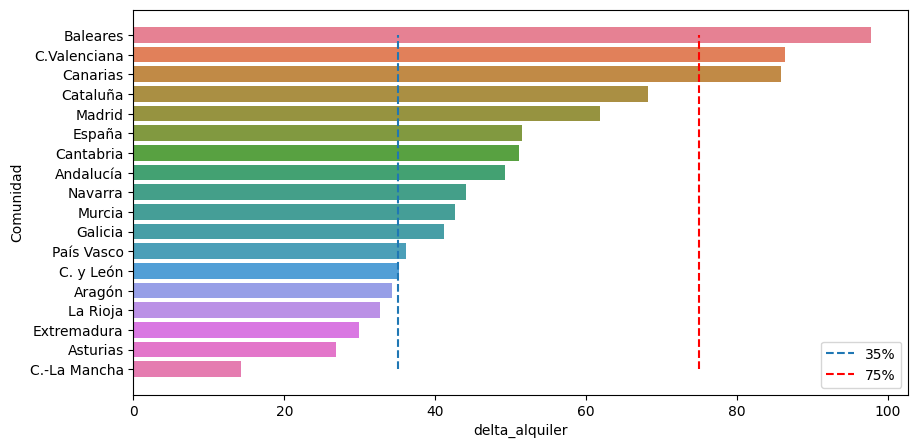

In [32]:
fig,axs = plt.subplots(1,1,figsize= (10,5))
sns.barplot(ax= axs, data = df_total.sort_values("delta_alquiler", ascending = False), x = "delta_alquiler", y = "Comunidad", orient = "horizontal", hue = "Comunidad")
axs.vlines(35, "C.-La Mancha","Baleares",linestyle= "--", label = "35%")
axs.vlines(75, "C.-La Mancha","Baleares",linestyle= "--",color = "red", label = "75%")
axs.legend();

*Mensajes:*  
*Las top-3 (Baleares, Valencia, Canarias, y cómo además), las top-3 por abajo (Extremadura, Asturias, C.-La Mancha), y sus valores*
*¿Podría usar este gráfica en la visualización?*

**Evolución Salarios**

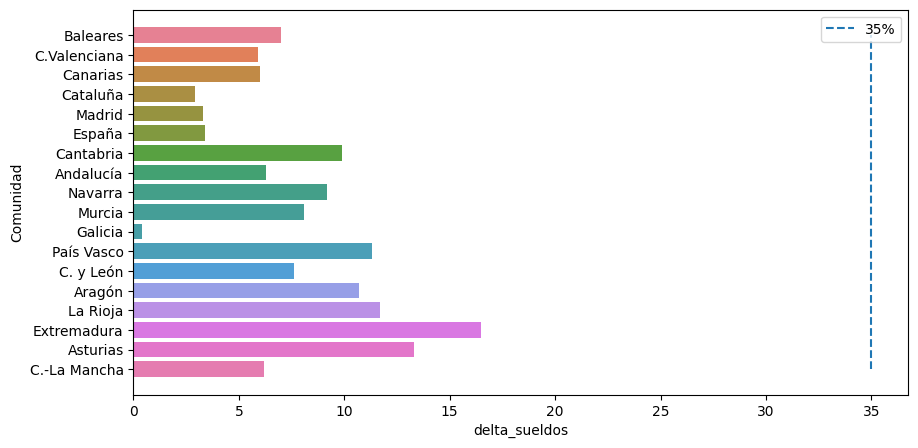

In [33]:
fig,axs = plt.subplots(1,1,figsize= (10,5))
sns.barplot(ax= axs, data = df_total.sort_values("delta_alquiler", ascending = False), x = "delta_sueldos", y = "Comunidad", orient = "horizontal", hue = "Comunidad")
axs.vlines(35, "C.-La Mancha","Baleares",linestyle= "--", label = "35%")
axs.legend();

*Mensajes:*  
*La relación entre subida de salario y subida de alquileres es casi inversa... Este es bueno. (me lo llevo a mensaje top)*  
*Las que más suben: Extremadura, Asturias, La Rioja, Las que menos: Galicia, Cataluña y Madrid*  
*Esto me da para hacer otros análisis: comunidades más interesantes para ir a vivir; gobierno y subidas de alquilers y salarios...ufff*

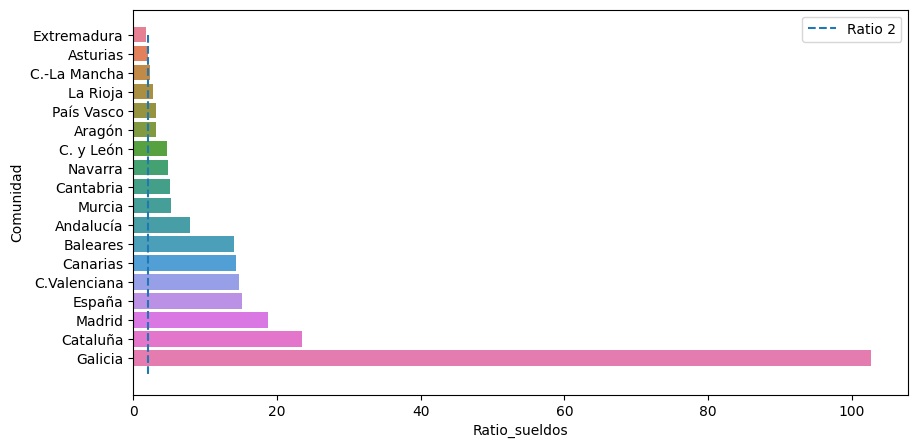

In [34]:
fig,axs = plt.subplots(1,1,figsize= (10,5))
sns.barplot(ax= axs, data = df_total.sort_values("Ratio_sueldos", ascending = True), x = "Ratio_sueldos", y = "Comunidad", orient = "horizontal", hue = "Comunidad")
axs.vlines(2, 0,18 ,linestyle= "--", label = "Ratio 2")
axs.legend();

**Importante:**
*Galicia es claremente un outlier, esto puede hacerme pensar en las próximas elecciones o bien de una forma más formal lo que debería hacer es revisar los datos porque la diferencia es muy potente*

**Evolución Turismo**

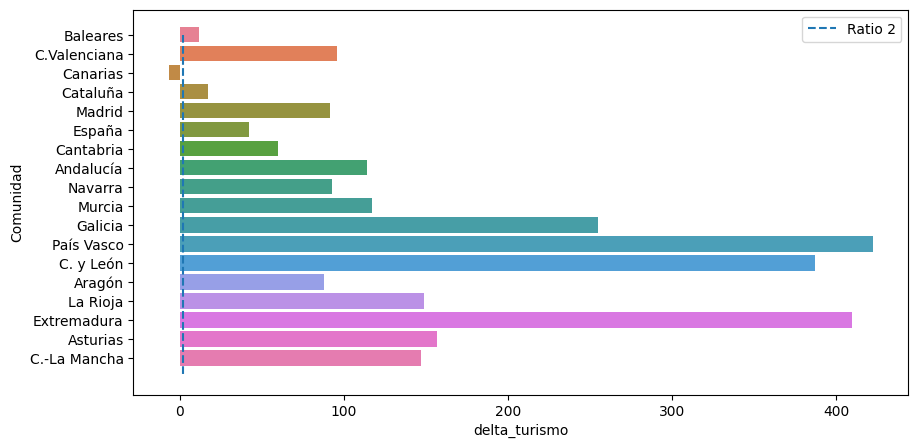

In [35]:
fig,axs = plt.subplots(1,1,figsize= (10,5))
sns.barplot(ax= axs, data = df_total.sort_values("delta_alquiler", ascending = False), x = "delta_turismo", y = "Comunidad", orient = "horizontal", hue = "Comunidad")
axs.vlines(2, 0,18 ,linestyle= "--", label = "Ratio 2")
axs.legend();

*Mensajes:*  
* *Esta gráfica es superinteresante, parece desmentir que el crecimiento por uso de pisos turísticos tenga una relación lineal con el aumento de los alquileres, por lo menos en términos relativos. Tendríamos que verlo en términos absolutos*    
* *Además entre las tres que menos crecen (e incluso decrecen) hay tres de las cuatro que más suben sus alquileres*  
* *Además como mensaje secundarios:*    
* *Pais Vasco, Castilla y León y Extremadura las que más crecen y casi al 400%*  
* *Cataluña, Canarias y Baleares las que menos*  
* *Canarias con crecimiento negativo*  
* *A profundizar: Todas crecen menos una Canarias. Aquí hay un punto de profundizar o bien de analizar como "outlier", igual que los sueldos en Galicia. Este es doblemente interesante, porque no es que no haya relación directa es que ha bajado el uso de pisos turísticos pero el alquiler ha subido más que en el resto del país*  


In [36]:
df_total["crecimiento_turismo"] = df_total["Pernoct_Turisticas_2022"] - df_total["Pernoct_Turisticas_2012"]

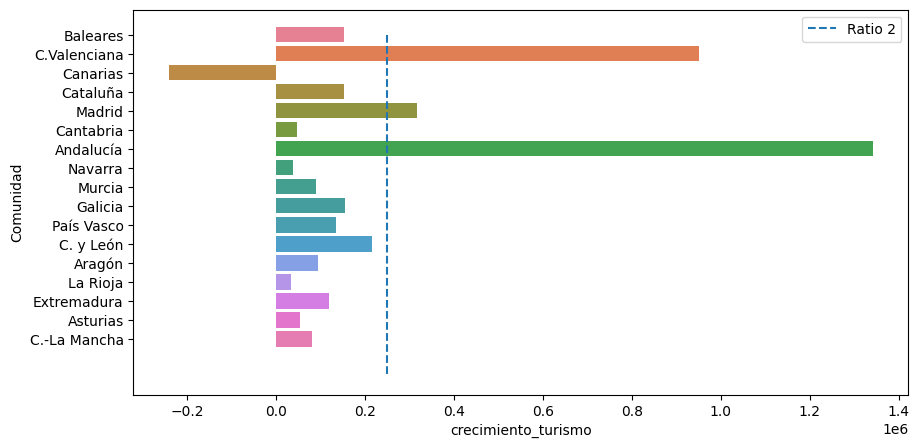

In [40]:
fig,axs = plt.subplots(1,1,figsize= (10,5))
sns.barplot(ax= axs, data = df_total[sin_esp].sort_values("delta_alquiler", ascending = False), x = "crecimiento_turismo", y = "Comunidad", orient = "horizontal", hue = "Comunidad")
axs.vlines(250000, 0,18 ,linestyle= "--", label = "Ratio 2")
axs.legend();

*Hmmm, ¿qué vemos aquí? (en término absolutos si puede haber una relación más directa en algunas comunidades Madrid-Valencia y algo más en Andalucia*
*Aquí es donde deberíamos analizar con respecto a las densidades de población*

### Trivariante Comunidad-Alquiler-Salario

*Numéricamente tenemos los ratios*

In [38]:
df_total[["Comunidad","Ratio_sueldos"]]

,Comunidad,Ratio_sueldos
0,País Vasco,3.194690
1,Madrid,18.727273
2,Cataluña,23.517241
3,España,15.147059
4,Navarra,4.793478
5,Baleares,13.971429
6,Cantabria,5.161616
7,Asturias,2.015038
8,Aragón,3.205607
9,Andalucía,7.809524


*Visualmente la que ya pintamos arriba, y podemos hacernos un scatter*

<Axes: xlabel='delta_sueldos', ylabel='delta_alquiler'>

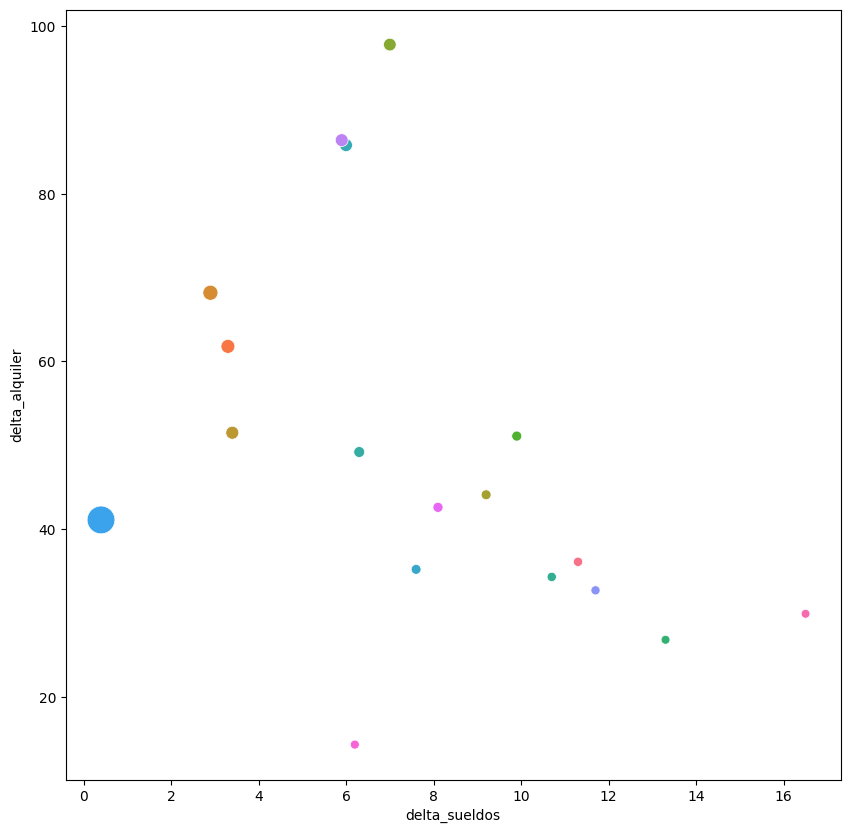

In [39]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df_total, y= "delta_alquiler", x = "delta_sueldos", size = "Ratio_sueldos", hue = "Comunidad", legend = False, sizes = (40,400))

*Refuerza parcialmente la relación casi inversa a partir de una subida de sueldo, y se ve un cambio de tendencia a partir de una subida de salario del 6, y también se ve claro el outlier de Galicia* 

### Mensajes

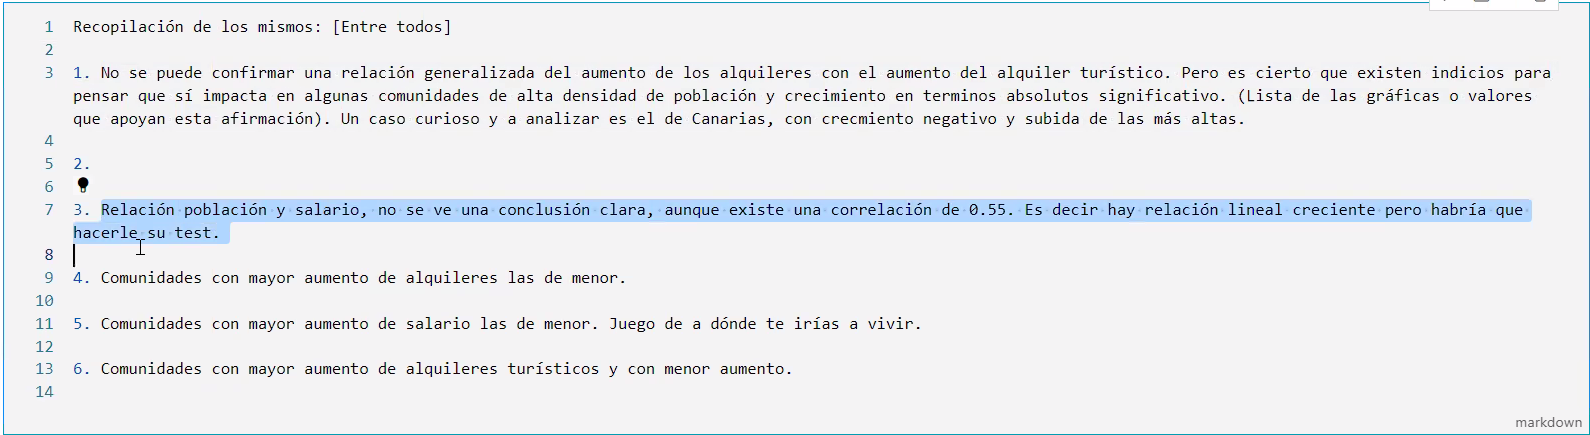


PRESENTACION




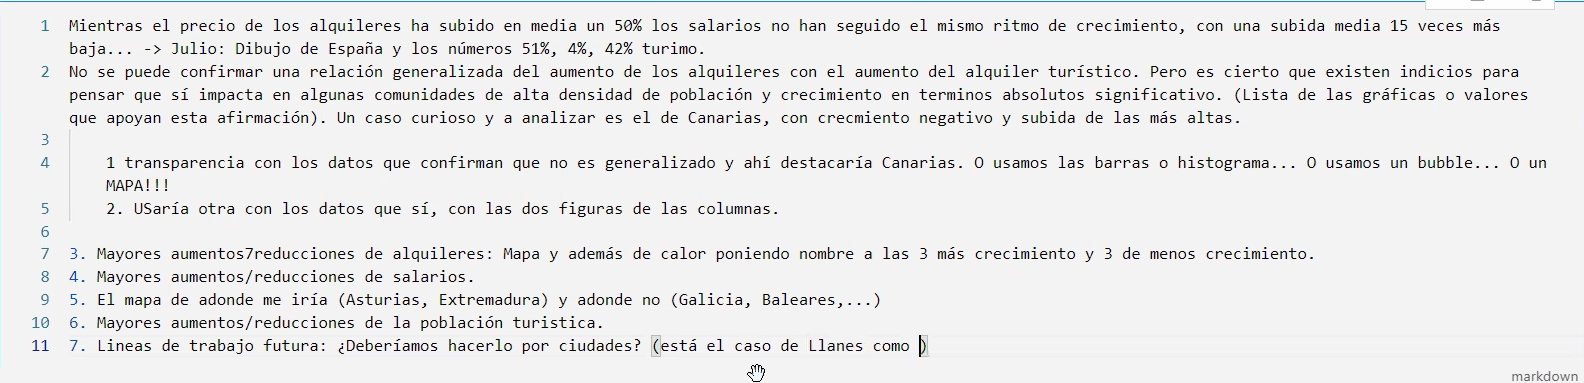

Recopilación de los mismos: 


### Presentación

Discusión de qué usar en función de mensajes:

### Visualización


TBD
